In [3]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [5]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
dataset.shape

(14, 5)

In [6]:
dataset.describe

<bound method NDFrame.describe of    Aparencia  Temperatura  Umidade       Vento Jogar
0        sol           85     85.0       FALSO   nao
1        sol           80     90.0  VERDADEIRO   nao
2    nublado           83     86.0       FALSO   sim
3      chuva           70      NaN       FALSO   sim
4      chuva           68     80.0       FALSO   sim
5      chuva           65     70.0  VERDADEIRO   nao
6      menos           64     65.0  VERDADEIRO   sim
7        sol         1220     95.0       FALSO   nao
8        sol           69     70.0       FALSO   sim
9      chuva           75    200.0         NaN   sim
10       sol           75     70.0  VERDADEIRO   sim
11   nublado           72     90.0  VERDADEIRO   sim
12   nublado           81     75.0       FALSO   sim
13     chuva           71     91.0  VERDADEIRO   nao>

In [6]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

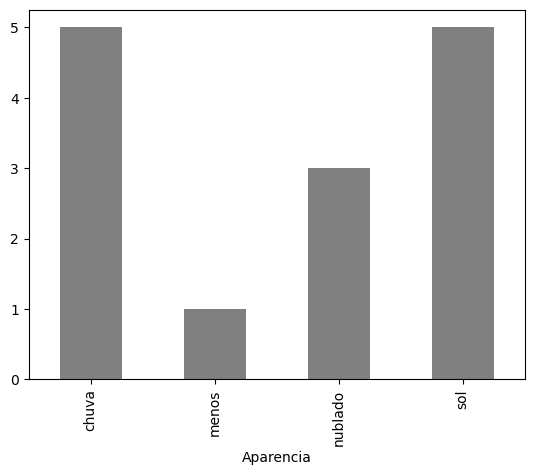

In [7]:
agrupado.plot.bar(color = 'gray')

In [8]:
#aparencia
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

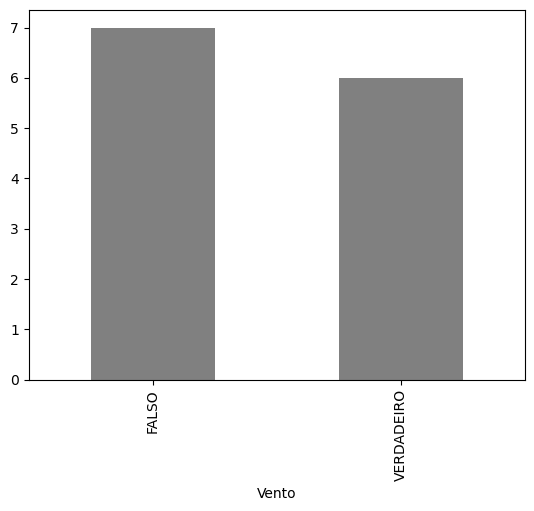

In [9]:
agrupado.plot.bar(color = 'gray')

In [10]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

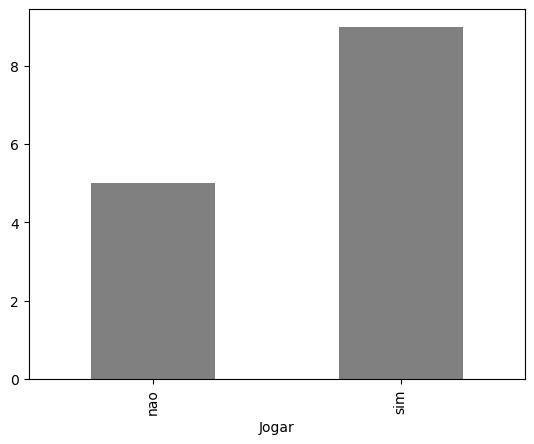

In [11]:
agrupado.plot.bar(color='gray')

In [13]:
#explorar colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

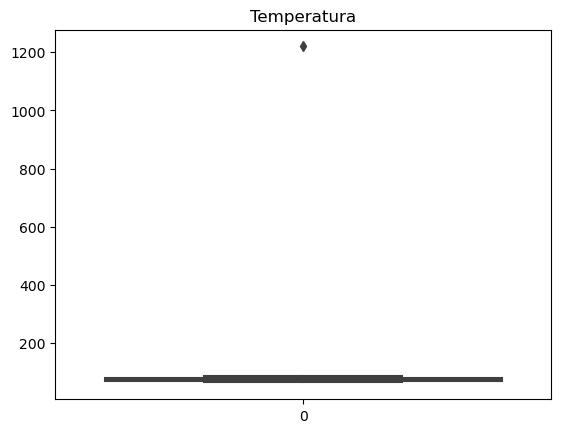

In [14]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\PAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperatura')

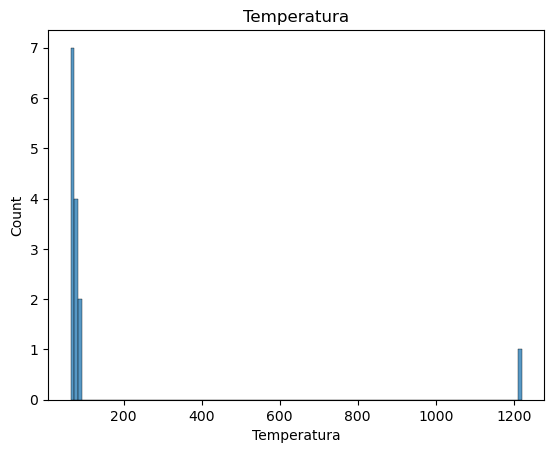

In [13]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

In [14]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

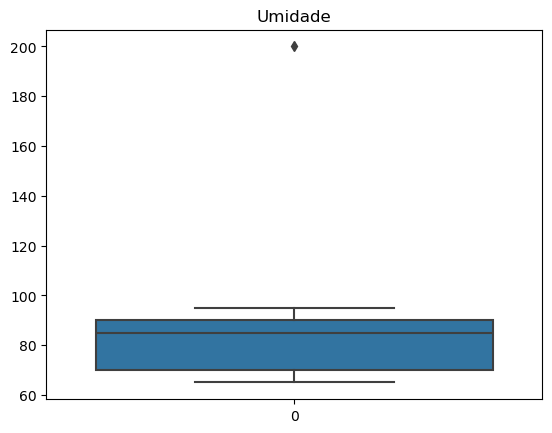

In [16]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\PAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Umidade')

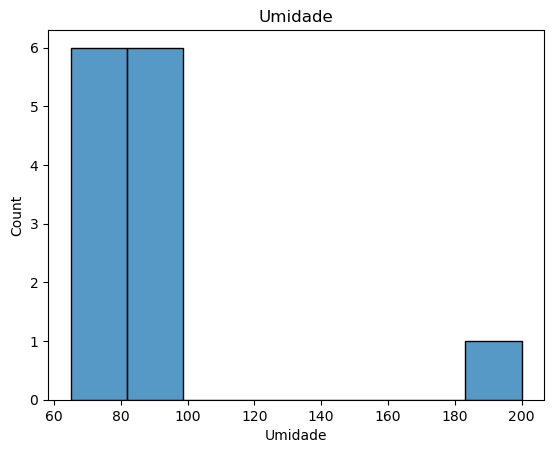

In [17]:
srn.histplot(dataset['Umidade']).set_title('Umidade')

In [18]:
dataset.isnull().sum()


Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [21]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [22]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [24]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [25]:
#calular a mediana

In [26]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [27]:
#substituir

In [29]:
dataset.loc[((dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130 )), 'Temperatura'] = mediana

In [ ]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio

In [30]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
#umidade, dominio e NAs

In [32]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [33]:
dataset['Umidade'].isnull().sum()

1

In [34]:
#calular a mediana

In [35]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [ ]:
#preenche NAs

In [38]:
dataset['Umidade'].fillna(mediana, inplace=True)
dataset['Umidade'].isnull().sum()

0

In [ ]:
#visuliza de acordo com o dominio de acordo com o dominio

In [39]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [40]:
#atualiza com mediana

In [41]:
dataset.loc[((dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100)), 'Umidade'] = mediana

In [42]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#Ventos

In [43]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [44]:
#total de Nas
dataset['Vento'].isnull().sum()

1

In [45]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [46]:
#total de Nas
dataset['Vento'].isnull().sum()

0

In [48]:
dataset.loc[(dataset['Vento'] == 'VERDADEIRO' ), 'Vento' ] = 1

In [49]:
dataset.loc[(dataset['Vento'] == 'FALSO' ), 'Vento' ] = 0

In [50]:
dataset['Vento']

0     0
1     1
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    1
12    0
13    1
Name: Vento, dtype: object

In [53]:
#sibstituindo sim por 1 e não por 0

In [55]:
dataset.loc[(dataset['Jogar'] == 'sim' ), 'Jogar' ] = 1
dataset.loc[(dataset['Jogar'] == 'nao' ), 'Jogar' ] = 0

In [56]:
dataset.describe

<bound method NDFrame.describe of    Aparencia  Temperatura  Umidade Vento Jogar
0        sol         85.0     85.0     0     0
1        sol         80.0     90.0     1     0
2    nublado         83.0     86.0     0     1
3      chuva         70.0     85.5     0     1
4      chuva         68.0     80.0     0     1
5      chuva         65.0     70.0     1     0
6        sol         64.0     65.0     1     1
7        sol         73.5     95.0     0     0
8        sol         69.0     70.0     0     1
9      chuva         75.0     85.5     0     1
10       sol         75.0     70.0     1     1
11   nublado         72.0     90.0     1     1
12   nublado         81.0     75.0     0     1
13     chuva         71.0     91.0     1     0>